# Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random 
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree

#Setting up the attributes and the dataset

In [2]:
#An approximate sensible range of age (for people with hypertension)
age=np.random.randint(10,121,size=100) 
#An approximate sensible range of weight
weight=np.random.randint(20,201,size=100) 
sleep=np.random.randint(0,24,size=100)
#The lowest and highest income in dollars per hour 
# as taken from the internet.
income=np.random.randint(7,4500,size=100) 
drink=np.random.randint(1,6,size=100) 
gender=np.random.choice(["M","F"],size=100,replace=True)
sports=np.random.choice([1,2,3,4,5,9], size=100)
salt=np.random.choice([1,2,3,4,5,9],size=100)
hypertension=np.random.choice(["L","H","N"],size=100, replace=True)


attributes_class=[age,weight,sleep,income,drink,gender,sports,salt,hypertension]

df=pd.DataFrame(attributes_class).transpose()
df.columns=["Age","Weight(Kgs)","Sleep (hours)","Income ($ per hour)","Drink","Gender","Sports","Salt","Hypertension"]

df=pd.get_dummies(df,columns=["Gender"])

the_dummy=df.copy()
the_dummy.drop("Hypertension",axis=1, inplace=True)
X=the_dummy
y=hypertension
print(y)
the_dummy.head()

['H' 'H' 'H' 'H' 'N' 'N' 'L' 'N' 'N' 'L' 'N' 'N' 'H' 'N' 'N' 'H' 'L' 'N'
 'H' 'L' 'H' 'N' 'L' 'N' 'N' 'N' 'L' 'L' 'N' 'N' 'L' 'H' 'N' 'N' 'H' 'H'
 'N' 'L' 'H' 'N' 'N' 'H' 'N' 'N' 'H' 'N' 'N' 'H' 'H' 'N' 'N' 'L' 'H' 'N'
 'H' 'H' 'L' 'H' 'N' 'N' 'H' 'L' 'H' 'N' 'H' 'H' 'N' 'L' 'N' 'L' 'L' 'L'
 'L' 'L' 'H' 'L' 'L' 'N' 'L' 'N' 'N' 'L' 'N' 'L' 'H' 'H' 'N' 'H' 'H' 'N'
 'H' 'L' 'H' 'H' 'N' 'N' 'H' 'H' 'N' 'N']


,Age,Weight(Kgs),Sleep (hours),Income ($ per hour),Drink,Sports,Salt,Gender_F,Gender_M
0,15,109,8,1278,1,4,1,0,1
1,19,162,13,1421,1,1,3,1,0
2,103,47,3,2388,1,5,3,0,1
3,93,177,22,4074,2,5,2,1,0
4,69,106,10,998,3,9,4,0,1


# Splitting the randomly generated dataset into training and testing data

In [3]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=45)
print("Training Split input- ", X_train.shape)
print("Testing Split input- ", X_test.shape)

Training Split input-  (70, 9)
Testing Split input-  (30, 9)


# Calculating the error and accuracy scores 

In [4]:
#tests the classification tree and calculates the accuracy and 
# the error percentages.

dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
print("Decision Tree Classifier Created")
y_pred=dtree.predict(X_test)
print(y_pred)
report=classification_report(y_test,y_pred,output_dict=True)
accuracy_score=(report["accuracy"])*100
error=(1-report["accuracy"])*100
print(f"The accuracy percentage is: {accuracy_score}%")
print(f"The error percentage is: {error}% ")

Decision Tree Classifier Created
['H' 'L' 'H' 'N' 'N' 'H' 'N' 'H' 'N' 'N' 'H' 'N' 'N' 'N' 'H' 'N' 'H' 'L'
 'H' 'N' 'L' 'N' 'N' 'N' 'N' 'N' 'N' 'H' 'H' 'N']
The accuracy percentage is: 30.0%
The error percentage is: 70.0% 


#Showing the tree

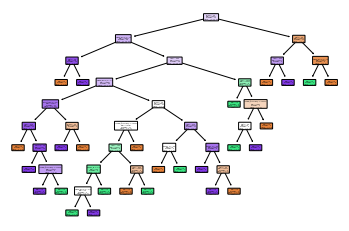

In [5]:
dec_tree = plot_tree(decision_tree=dtree, feature_names = X.columns, 
                     class_names =["L","H","N"] , filled = True , precision = 4, rounded = True)
# please zoom in to see/ download the picture

**We can see that pruning won't work as most of the nodes here have two divisions and more than one leaf. This would mean that most of the leaf nodes would have very few samples from the training set, which might indicate overfitting of data.
However, more concrete proof is shown in the next cell.**

#PLot to show that pruning isn't effective for this scenario

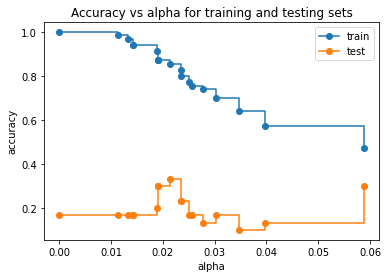

In [6]:
#The code below checks if pruning the data will help get better results. 
#This is done by using the complexity pruning path module in python. 
#We set different ccp_alpha values in the Treeclassifier and 
#check the accuracy of the classifier in each case.

clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

#**The final answer**:


*   For most of the datasets, the accuracy score is below 50%. For the randomly generated dataset, at the **time of submission**, the error percentage was 70% and accuracy was 30%.
*   The low accuracy might be due to overfitting of data.
*   The plot above shows that the accuracy value doesn't improve through pruning. For higher CCP values more nodes are pruned, however there's no significant change in the accuracy as CCP value changes, as it can be seen from the graph.  
* Most of the nodes here have two divisions and more than one leaf. Hence, pruning even a large number of branches might not improve the accuracy as shown by the plot.
*   However, there are certain pre-pruning methods that might help in imporving the accuracy. These include fixing the minimum number of samples in a node and fixing the maximum depth of the tree.









#References:


1.   Professor Sundar's Class Notes
2.   [Decision Tree Pruning explained | Sebastian Mantey](https://youtu.be/u4kbPtiVVB8)
3.   [Post pruning decision trees](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html)   

